EDA Project: Student Habits, Lifestyle, and Academic Performance

This project explores a dataset of student habits and academic performance with the goal of uncovering
meaningful patterns beneath the surface of daily routines. By examining study hours, sleep duration,
attendance, screen time, and other lifestyle factors, we aim to reveal how these behaviors interact and
ultimately shape academic success. Through thoughtful exploratory data analysis (EDA), this work seeks to
provide insights that educators, parents, and students themselves can use to make informed decisions,
promote healthier learning habits, and improve academic outcomes.



In [2]:
#import the necessary libraries.

import pandas as pd
import numpy as np
import plotly.express as px


In [19]:
#import the detaset and saving it as stutends dataframe.

url = "https://raw.githubusercontent.com/jacktriger-debug/student-habits-performance/main/student_habits_performance.csv"

students = pd.read_csv(url)
students.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [20]:
#the output from students.info() whows that there are missing values in parental_education_level
#other than that everything else look fine.

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [23]:
#after further invastigation (looking at the csv file in exel) i discovered that the missing values are just
#parents without education i will fix it with fillna method.

students = students.fillna('None')

In [6]:
#to check if the previous command worked run the isna() method to see if there are any missing values
#after running the command there are no more missing values in the deta set.
print(students.isna().sum())

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [7]:
#the describe method will show statistic summery for the detaset.
#count show 10000 non-null enteries across all deta indicating consistent deta.
students.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Study hours correlate strongly and positively with exam scores, while social media hours display a moderate negative correlation. Mental health rating positively correlates with exercise frequency and student performance, suggesting that well-being is interconnected with both lifestyle choices and academic outcomes. Sleep hours show a small but positive correlation with performance, highlighting the importance of a balanced routine.

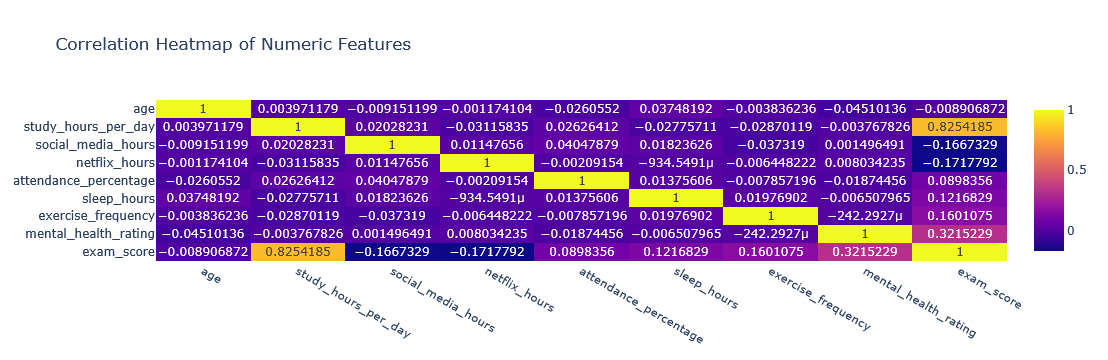

In [20]:
#correlation heatmap
numeric_df = students.select_dtypes(include="number")
corr = numeric_df.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    aspect="auto",
    title="Correlation Heatmap of Numeric Features"
)
fig.show()



One of the strongest findings concerns the relationship between study hours per day and exam scores. The scatter plots show a clear, positive relationship: students who dedicate more time to studying tend to achieve higher exam scores. While there is some natural variation, the general upward trend suggests that consistent study routines remain one of the most influential predictors of academic achievement. Additionally, when the data is colored by parental education level, the plot indicates that students from families with higher educational backgrounds tend to cluster slightly higher in performance. This may reflect increased academic support at home or greater familiarity with structured learning environments.

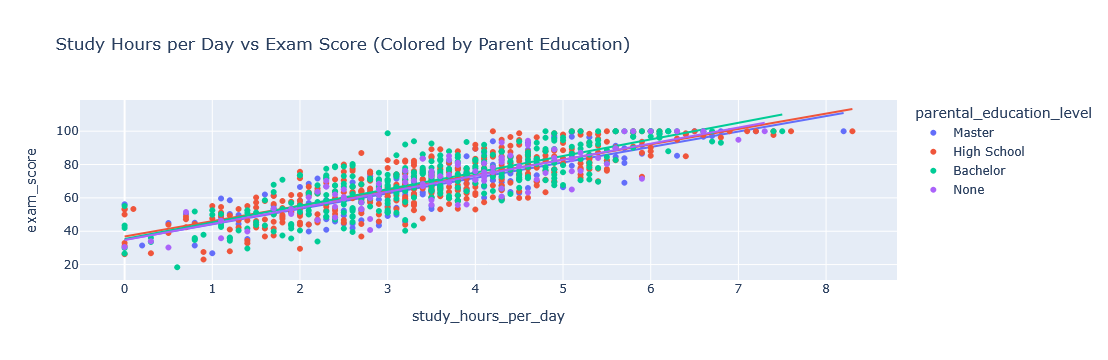

In [24]:
#scatter plot of study hours vs exam score Colored by Parent Education.
fig = px.scatter(
    students,
    x="study_hours_per_day",
    y="exam_score",
    trendline="ols",
    color="parental_education_level",
    title="Study Hours per Day vs Exam Score (Colored by Parent Education)"
)
fig.show()



Social media use also plays a significant role. The plot of social_media_hours versus exam score shows a generally negative trend: higher usage is associated with lower academic performance. When the data is colored by part-time job status, Excessive social media use may hinder concentration, reduce available study time, and increase stress levels.but it apear that part time job dont play a role to exam score.

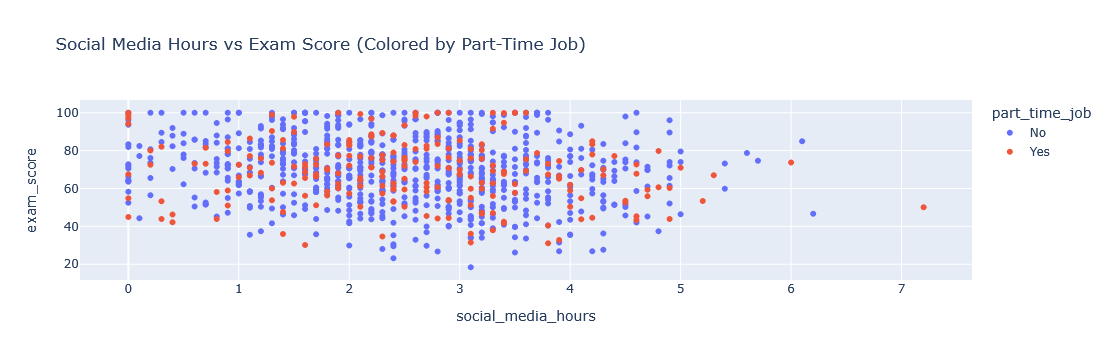

In [25]:
#scatter plot of Social Media Hours vs Exam Score (Colored by Part-Time Job)
fig = px.scatter(
    students,
    x="social_media_hours",
    y="exam_score",
    color="part_time_job",
    title="Social Media Hours vs Exam Score (Colored by Part-Time Job)"
)
fig.show()

Another important dimension involves the connection between exercise frequency and both academic performance and mental well-being. The scatter plot of exercise frequency versus exam scores shows a mild but noticeable positive trend, indicating that students who exercise more regularly often perform slightly better academically. More striking, however, is the relationship between exercise and mental health rating. Students who exercise frequently tend to report higher mental health scores, illustrating the well-documented mental health benefits of physical activity. This suggests that encouraging students to incorporate regular exercise into their schedules could support both their emotional resilience and academic success.

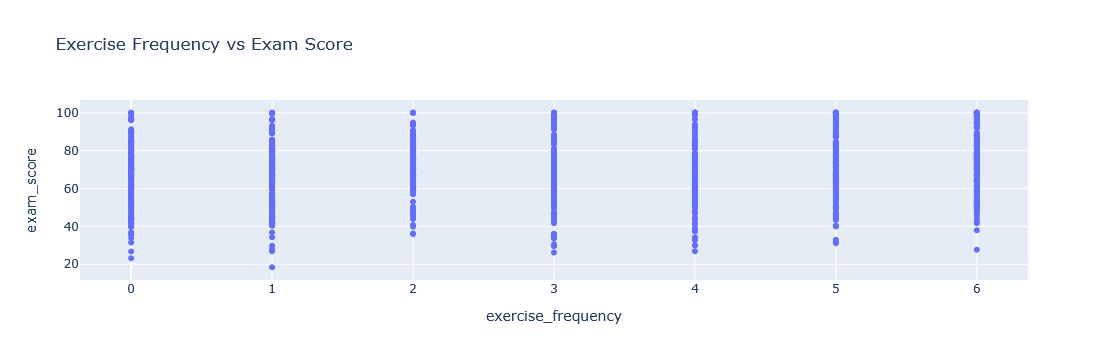

In [26]:
#scatterplot of exercise frequency vs exam score.
fig = px.scatter(
    students,
    x="exercise_frequency",
    y="exam_score",
    title="Exercise Frequency vs Exam Score"
)
fig.show()

Finally, the exploration of parental education level through a pie chart demonstrates that the dataset includes students from diverse educational backgrounds. While performance is influenced by many factors, parental education appears to contribute some advantage, likely through motivation, expectations, or available learning support.

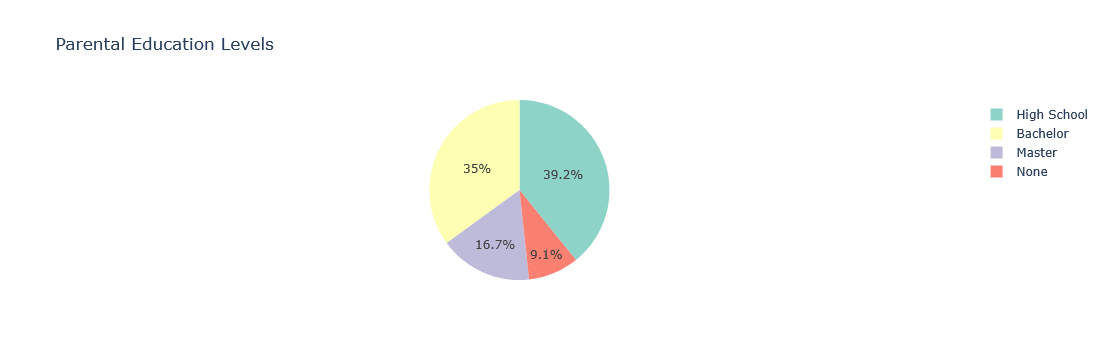

In [28]:
#pie chart of education lever.
fig = px.pie(
    students,
    names="parental_education_level",
    title="Parental Education Levels",
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()

Overall, the EDA reveals that academic performance is shaped by a combination of study habits, health behaviors, and personal lifestyle choices. Consistent studying, regular exercise, balanced mental health, and limited social media use all play positive roles in raising exam scores. These findings highlight the importance of adopting holistic support strategies that address not only academic instruction but also the broader well-being of student.